### Q1. Read the paper and write a 4-7 sentence (about a paragraph) summary. State in your own words what you learned, what expanding your knowledge of the topic and what you found interesting about the information you received. Please include the major points of the paper, and any weaknesses the authors point out with their research.

* This paper mainly focuses on all the factors that are associated with fatal pedestrian crashes that occured in Kansas and USA.  KARS(Kansas Accident Reporting System) and USA FARS(Fatality Analysis Reporting System) data is used in this study. The objective of this study are to compare trend of pedestrian facilities in Kansac than that of USA, determine relation between different variables constants like human variables(age and gender), enviromental variables(atmospheric condition), time, etc. Inadequate vision, physical limitations, a loss of reflection, etc. are The causes of senior pedestrian fatalities includes physical limitations, loss of reflection, inadequate vision,etc. The countermeasures can be implemented to reduce number of pedestrian crashes. 

###  Q2.  Answer the following questions:

#### (a) What time of day is most common for pedestrian fatalities in Kansas (over all years)?


* Between midnight and 6 am, fatal pedestrian crashes occurs maximum number of times with approx 24%. Between 9 pm and midnight, fataties occur at 23%.

#### (b) How does this compare with the most common time of day for the US overall?
 

* This time period only makes up 9% of all fatalities in the USA, which is the least amount of pedestrian fatalities among all the intervals. Between 6 pm and 9 pm, highest number of pedestrian fatalities (25 %) occur.

#### (c) Looking at figure 11, would you say poor atmospheric conditions have a significant impact on pedestrial fatalities?

* From the figure we can see that, whenever there is a clear day with no adverse condition, the major of fatal crashes occur at a rate of 87% of fatal pedestrian crashes in Kansas and 89% in USA.  10% of all fatal pedestrian accidents in Kansas and 8% nationwide occur in the rain. In both the United States and Kansas, snow is the factor that causes the fewest collisions. People often choose to stroll when the weather is nice, which ultimately increases the frequency of deadly pedestrian collisions.

#### (d) On page 392, the author states “For Kansas, speed limits between 30 mph and 40 mph account for 52% of total crashes (26% crashes for 30 mph and 26% for 35 mph or 40mph), …”. Why is this statement as written incorrect?

* There are many rural roads in Kansas where the speed limit is high and where rules are not consistently enforced, all of which could increase the likelihood of deadly pedestrian accidents.


#### (e) Take the data from Figure 4 and Figure 9 and combine them. What you will end up with is a grouping by age band, then by time of day. Your final graph will be able to answer questions about which age group is more or less likely to experience a pedestrian fatality during which time of day.

* Breakers need to be installed after a particular amount of time. The established speed limits on the roadways should also be made known to the public.

# Perform cluster analysis on NHTSA FARS data

In [1]:
import os,requests,collections,zipfile # importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
df_main = pd.DataFrame()

for k in range(1975, 2021, 5):
    df_accident = pd.read_csv(f"accident_all_years/{k}_accident.csv", encoding = 'ISO-8859-1',low_memory=False)
    
    df_person = pd.read_csv(f"person_all_years/{k}_person.csv", encoding = 'ISO-8859-1',low_memory=False)
    df_person.drop(["HARM_EV"],inplace=True,axis=1)
    
    df_vehicle = pd.read_csv(f"vehicle_all_years/{k}_vehicle.csv", encoding = 'ISO-8859-1',low_memory=False)
    df_vehicle.drop(["HARM_EV"],inplace=True,axis=1)
    
    df_merge = pd.merge(df_accident,df_person,on='ST_CASE',how="inner").reset_index(drop=True)
    
    df_main=pd.merge(df_merge,df_vehicle,on="ST_CASE",how="inner").reset_index(drop=True)

In [3]:
df_main=df_main[df_main["STATENAME_x"] != "KANAS"]

df_main=df_main[["AGE","FATALS","HARM_EV","VSPD_LIM","HOURNAME","HOUR","YEAR"]]

df_main=df_main[df_main["HARM_EV"]==8]

In [4]:
df_main["VSPD_LIM"].mask(df_main["VSPD_LIM"]>=60,"60 mph ot higher",inplace=True)
df_main["VSPD_LIM"].mask(df_main["VSPD_LIM"]==35,"35 or 40 mph",inplace=True)
df_main["VSPD_LIM"].mask(df_main["VSPD_LIM"]==40,"35 or 40 mph",inplace=True)
df_main["VSPD_LIM"].mask(df_main["VSPD_LIM"]==45,"45 or 50 mph",inplace=True)
df_main["VSPD_LIM"].mask(df_main["VSPD_LIM"]==50,"45 or 50 mph",inplace=True)
df_main["VSPD_LIM"].mask(df_main["VSPD_LIM"]==55,"55 mph",inplace=True)

In [5]:
dis=[0,5,10,15,20,25,30]
for i in dis:
    df_main["VSPD_LIM"].mask(df_main["VSPD_LIM"]==i,"30 mph or less",inplace=True)

In [6]:
ab=df_main.groupby(by="VSPD_LIM").sum()
vel=["30 mph or less","35 or 40 mph","45 or 50 mph","55 mph","60 mph ot higher"]

fatals_tot=ab["FATALS"].sum()
fatals_per=[]
for i in range(len(vel)):
    fatals_per.append(ab["FATALS"][i]/fatals_tot*100)

#### Recreate the graph (with actual FARS data) 

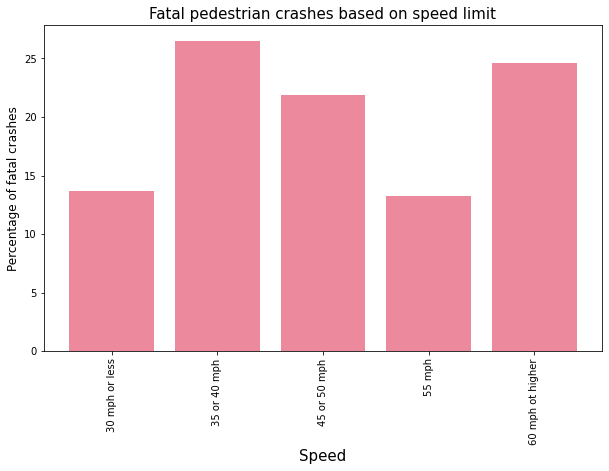

In [7]:
plt.figure(figsize=(10,6))
plt.bar(x=vel,color="crimson",alpha=0.5,height=fatals_per)
plt.xticks(rotation=90)
plt.xlabel("Speed",fontsize=15)
plt.ylabel("Percentage of fatal crashes",fontsize=12)
plt.title("Fatal pedestrian crashes based on speed limit",fontsize=15)
plt.show()

#### Recreate Figure 4 and Figure 9.

In [8]:
age=[]
for i in df_main["AGE"]:
    if i>0 and i<16:
        age.append("< 16")
    elif i>=16 and i<=24:
        age.append("16-24")
    elif i>=25 and i<=34:
        age.append("25-34")
    elif i>=35 and i<=44:
        age.append("35-44")
    elif i>=45 and i<=54:
        age.append("45-54")
    elif i>=55 and i<=64:
        age.append("55-64")
    else:
        age.append("65+")
df_main["AGE_GRP"]=age
ab=df_main.groupby(by="AGE_GRP").sum()

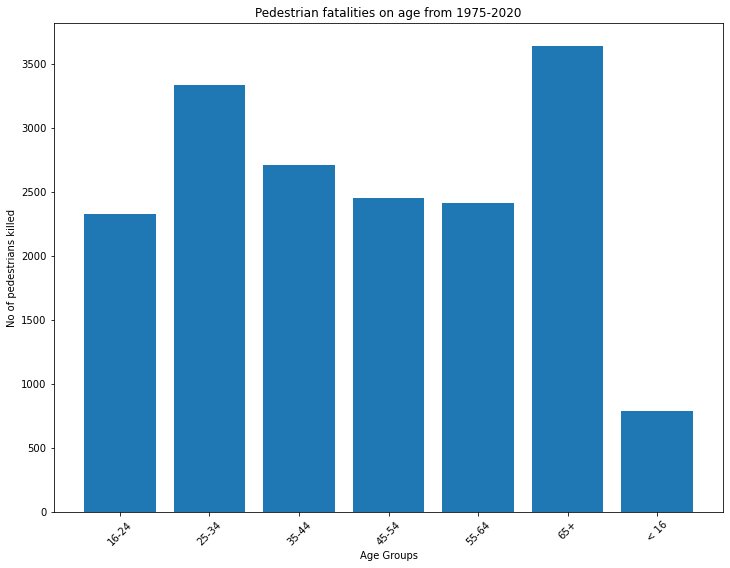

In [9]:
plt.figure(figsize=(12,9))
plt.bar(x=ab.index,height=ab["FATALS"])
plt.xticks(rotation=45)
plt.xlabel("Age Groups")
plt.ylabel("No of pedestrians killed")
plt.title("Pedestrian fatalities on age from 1975-2020")
plt.show()

In [10]:
timeperiod=[]
for i in df_main["HOUR"]:
    if i>=0 and i<=5:
        timeperiod.append("Midnight to 5:59 am")
    elif i>=6 and i<=8:
        timeperiod.append("6 am to 8:59 am")
    elif i>=9 and i<=14:
        timeperiod.append("9 am to 2:59 pm")
    elif i>=15 and i<=17:
        timeperiod.append("3 pm to 5:59 pm")
    elif i>=18 and i<=20:
        timeperiod.append("6pm to 8:59 pm")
    else:
        timeperiod.append("9 pm to 11:59 pm")

In [11]:
df_main["Time_grp"]=timeperiod
ae=df_main.groupby(by="Time_grp").sum()

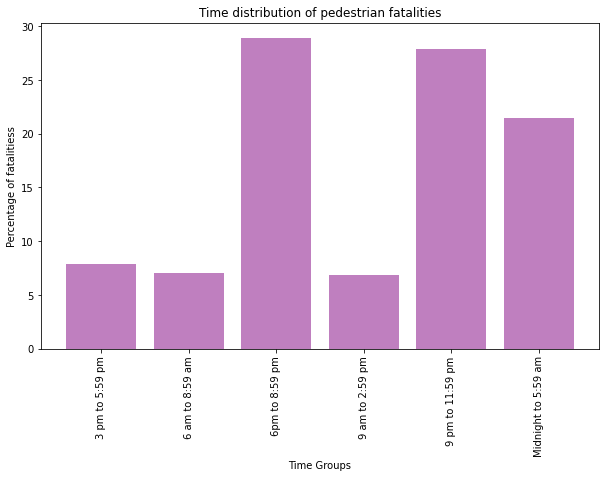

In [12]:
plt.figure(figsize=(10,6))
plt.bar(x=ae.index,height=ae["FATALS"]/ae["FATALS"].sum()*100,color='purple',alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel("Time Groups")
plt.ylabel("Percentage of fatalitiess")
plt.title("Time distribution of pedestrian fatalities")
plt.show()

#### Take the data from Figure 4 and Figure 9 and combine them. What you will end up with is a grouping by age band, then by time of day. Your final graph will be able to answer questions about which age group is more or less likely to experience a pedestrian fatality during which time of day.

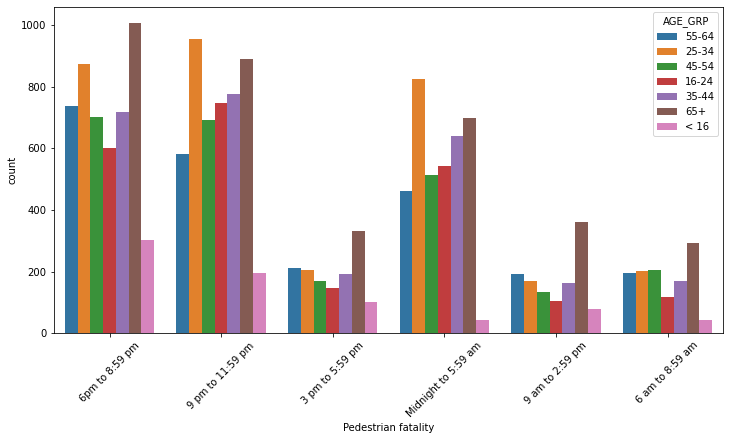

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x="Time_grp",hue="AGE_GRP",data=df_main)
plt.xticks(rotation=45)
plt.xlabel("Pedestrian fatality")
plt.show()

#### Task: (Reshape the US dataset from HW1)

In [15]:
df_main1 = pd.DataFrame()
for i in range(1975, 2021, 5):
    df = pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding = 'ISO-8859-1')
    df_main1 = pd.concat([df_main1, df]).reset_index(drop=True)
df_select = df_main1.loc[:, ["STATE","STATENAME" ,'MONTH', 'DAY', 'HOUR', 'PERSONS', 'MAN_COLL', 'LGT_COND', 'WEATHER', 
                                'SCH_BUS', 'FATALS', 'DAY_WEEK', 'DRUNK_DR',"HARM_EV"]]

df_select=df_select[df_select["STATENAME"]!="Kansas"]
df_select.drop("STATENAME",inplace=True,axis=1)
df_select=df_select[df_select["HARM_EV"]==8]
df_select.dropna(inplace=True)
df_select=df_select.sample(n=5000)
df_select.head()

,STATE,MONTH,DAY,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR,HARM_EV
306311,51,11,10,12,1,0,1,1,0.0,1,4,1,8
102162,25,12,24,17,3,0,3,1,0.0,1,3,0,8
79306,48,7,29,23,2,0,2,1,0.0,1,3,0,8
67082,36,6,5,4,1,0,2,1,0.0,1,5,0,8
44829,6,6,27,13,2,0,1,1,0.0,1,6,0,8


#### Perform ad hoc K-Means clustering

In [16]:
sc=StandardScaler()
new_scaled_data=sc.fit_transform(df_select)

In [17]:
arr=[5,10,12]
for k in arr:
    c=KMeans(n_clusters=k,init='k-means++')
    c.fit(new_scaled_data)
    print("Centroids of cluster:{}".format(c.cluster_centers_))

Centroids of cluster:[[-2.55762043e-03  3.90108604e-03 -1.31662615e-02  9.73754498e-03
  -5.49582549e-02  0.00000000e+00 -4.54605334e-02 -9.86035575e-02
  -7.22992486e-02 -1.14817802e-01 -1.45484756e-02 -4.11379051e-01
   0.00000000e+00]
 [ 2.66903991e-01 -3.51870260e-01 -1.54748787e-01 -4.01124612e-01
   1.26740591e-01  0.00000000e+00 -7.76403212e-01 -8.07367257e-02
   1.38314024e+01  2.14739609e-01 -2.11456754e-01 -4.11379051e-01
   0.00000000e+00]
 [-1.52915051e-02  2.64755305e-03  7.42030579e-02 -5.37963672e-02
   2.60584471e-01  0.00000000e+00  2.05621067e-01 -1.29957809e-01
  -7.22992486e-02 -1.14817802e-01  9.14687516e-02  2.29512567e+00
   0.00000000e+00]
 [ 9.01868380e-02 -1.48730677e-01  8.23024827e-02 -1.74381839e-01
   1.19553898e+00  0.00000000e+00  8.75316774e-03 -1.17507971e-01
  -7.22992486e-02  8.58755760e+00  5.48180304e-02  2.69022944e-01
   0.00000000e+00]
 [ 1.66442331e-01  1.19588888e-02 -3.90859251e-02  3.90110175e-01
  -8.56729550e-01  0.00000000e+00  9.82447699

#### Perform elbow analysis to find optimal cluster size

In [18]:
max_clusters = 15
css = [] # within cluster sum of squares
for k in range(1,max_clusters):
    kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=200, n_init=10, random_state=0)
    kmeans.fit(new_scaled_data) # where d is the dataset you have standardized in the first part of this
    css.append(kmeans.inertia_)

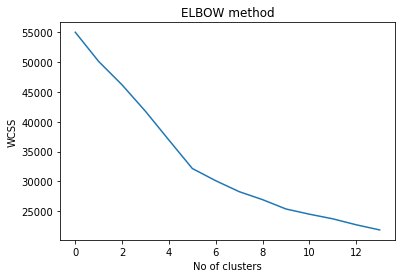

In [19]:
plt.plot(css)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.title("ELBOW method")
plt.show()

#### Find out where Kansas fits in

In [21]:
c1=KMeans(n_clusters=6,init='k-means++')
c1.fit(new_scaled_data)
label=c1.predict(new_scaled_data)

In [22]:
s1=[]
fatal=[]
for i in range(len(new_scaled_data)):
    fatal.append(new_scaled_data[i][9])
    s1.append(new_scaled_data[i][0])

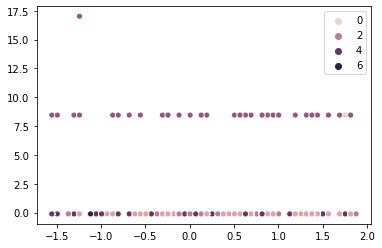

In [23]:
sns.scatterplot(s1,fatal,hue=label)

* According to what we found using our optimal K value using elbow method which is 6 in our case it seems that Kansas is going to fit in cluster has label 0

#### Perform Agglomorative Clustering

In [24]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [25]:
aglo_c=AgglomerativeClustering(n_clusters=5)
aglo_c=aglo_c.fit(new_scaled_data)

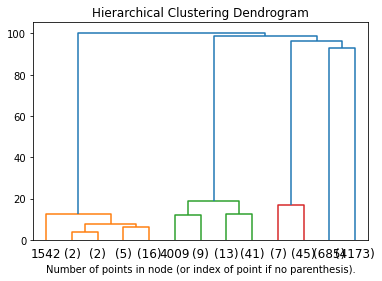

In [26]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(new_scaled_data)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()